In [1]:
# 기존: !pip install pandas konlpy matplotlib wordcloud
!pip install pandas kiwipiepy matplotlib wordcloud

In [2]:
import pandas as pd
from kiwipiepy import Kiwi
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os

# 한글 그래프 깨짐 방지
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
print("현재 작업 폴더:", os.getcwd())
print("이 폴더 안 파일:", os.listdir())

현재 작업 폴더: C:\Users\PC\python_fang\251106_Inpowerproject_2
이 폴더 안 파일: ['.ipynb_checkpoints', 'Inpowerproject_2_matplotlib.ipynb', 'Inpowerproject_2_plotly.ipynb', 'UT_morph_visuals_only.pdf', 'UT_morph_visuals_only_ver2.pdf', '조사자노트_형태소분석_rawdata_INPOWER PROJECT2 - after.csv', '조사자노트_형태소분석_rawdata_INPOWER PROJECT2 - before.csv']


In [4]:
before_path = r"C:\Users\PC\python_fang\251106_Inpowerproject_2\조사자노트_형태소분석_rawdata_INPOWER PROJECT2 - before.csv"
after_path  = r"C:\Users\PC\python_fang\251106_Inpowerproject_2\조사자노트_형태소분석_rawdata_INPOWER PROJECT2 - after.csv"

# CSV 불러오기
before_df = pd.read_csv(before_path, encoding="utf-8")
after_df  = pd.read_csv(after_path, encoding="utf-8")

print("before:", before_df.shape)
print("after :", after_df.shape)

display(before_df.head())
display(after_df.head())


before: (21, 9)
after : (28, 9)


,Unnamed: 0,userid,username,test,senario,time1_Search,time2_Explore,answer,behave
0,NaN,1,정다혜,Before,1. 플랫폼이동 용이성 \n= 신세계백화점 탭 이동,60,NaN,NaN,검색으로 신세게 백화점 워딩을 쳐봄 \n지금 보여지는 화면이 신세계 백화점이 맞나 ...
1,NaN,1,정다혜,Before,2. 상품구매 플로우 효율성 \n= 메인홈 화면 상품 구매,81,NaN,NaN,비회원 구매가 안되서 카카오 로그인으로 이동\n비회원 조회하기로 헷갈려함
2,NaN,1,정다혜,Before,3. 콘텐츠 페이지 흥미성 \n=라이브 커머스 메뉴 후기,86,40.0,굳이..?\n찾기도 힘들다 \n왜 .. 만들었나… \n그냥….딱히..,검색 없이 찾지를 못함
3,NaN,2,유가영,Before,1. 플랫폼이동 용이성 \n= 신세계백화점 탭 이동,6,NaN,내가 쓱을 좀 잘쓰지,NaN
4,NaN,2,유가영,Before,2. 상품구매 플로우 효율성 \n= 메인홈 화면 상품 구매,30,NaN,NaN,영상녹화 실패


,Unnamed: 0,userid,username,test,senario,time1_Search,time2_Explore,answer,behave
0,NaN,1,정다혜,After,1. 플랫폼이동 용이성 \n= 신세계백화점 탭 이동,4.0,NaN,NaN,NaN
1,NaN,1,정다혜,After,2. 상품구매 플로우 효율성 \n= 메인홈 화면 상품 구매,28.0,NaN,약간 결제할때 비회원구매 보이는건 편한데 고객정보 배송지가 입력하는데가 한눈에 안보...,NaN
2,NaN,1,정다혜,After,3. 콘텐츠 페이지 흥미성 \n=고객 후기 콘텐츠,77.0,105.0,메뉴찾을때 \n내가 보고싶은 후기만 보고싶다 \n관심이 있는 것만 보고싶다,NaN
3,NaN,1,정다혜,After,4. UX시각적 만족도\n=목업페이지 만족도,NaN,NaN,"조금더 미니멀함 심플하다 \n쇼핑몰로 넘어가는게 편하다 \n행사, 특가 이런 정보가...",NaN
4,NaN,2,유가영,After,1. 플랫폼이동 용이성 \n= 신세계백화점 탭 이동,5.0,NaN,끝,NaN


In [5]:
print("before 컬럼 이름:", list(before_df.columns))
print("after  컬럼 이름:", list(after_df.columns))

before 컬럼 이름: ['Unnamed: 0', 'userid', 'username', 'test', 'senario', 'time1_Search', 'time2_Explore', 'answer', 'behave']
after  컬럼 이름: ['Unnamed: 0', 'userid', 'username', 'test', 'senario', 'time1_Search', 'time2_Explore', 'answer', 'behave']


In [6]:
text_col = "answer"   # 예: "answer" 또는 "내용" 또는 "피드백" 등 실제 이름으로 수정

In [7]:
from kiwipiepy import Kiwi
from collections import Counter

kiwi = Kiwi()

# 공통 불용어(원하면 계속 추가)
stopwords = set([
    "것","거","수","등","들","좀","더","너무","정도","이번","부분",
    "때","이거","저거","그거","그냥","우리","나","저","너","있다",
    "하다","되다","이다","같다","사용자","유저","테스트","앱"
])

# 감탄사(한 글자여도 의미 있는 것) 화이트리스트
interj_keep = {"와","헉","어머","우와","앗","엇","아","에이","음","흠"}

# 품사 세트 정의
NOUN_TAGS  = {"NNG","NNP"}                    # 명사
FEEL_TAGS  = {"VA","MAG","MAJ","IC","VV","VX"} # 느낌어(형용사/부사/감탄사/동사)

def extract_tokens(series, include_tags, use_lemma=True):
    """
    series: pandas Series(문장들)
    include_tags: 포함할 품사 태그 set
    use_lemma: 기본형(어간)으로 정규화할지 여부 (좋다/좋아요 -> 좋다)
    return: Counter 단어빈도
    """
    text = " ".join(series.astype(str))
    tokens = kiwi.tokenize(text)
    bag = []
    for t in tokens:
        # 태그 앞부분이 일치하면 포함 (예: 'VA+' 처럼 붙는 경우도 잡으려고 startswith 사용)
        if any(t.tag.startswith(tag) for tag in include_tags):
            # 기본형(lemma) 우선, 없으면 표면형(form)
            w = getattr(t, "lemma", None) or t.form

            # 감탄사는 한 글자도 살리고, 그 외는 2글자 이상 추천
            if t.tag.startswith("IC"):
                keep = (w in interj_keep) or (len(w) >= 2)
            else:
                keep = len(w) >= 2

            if keep and (w not in stopwords):
                bag.append(w)
    return Counter(bag)

In [8]:
# ⬅️ 여기에 너의 텍스트 열 이름(예: "answer", "내용")을 그대로 넣어줘
text_col = "answer"

# NaN 방지
before_df[text_col] = before_df[text_col].fillna("")
after_df[text_col]  = after_df[text_col].fillna("")

# ① 명사 전용 빈도
before_nouns = extract_tokens(before_df[text_col], include_tags=NOUN_TAGS)
after_nouns  = extract_tokens(after_df[text_col],  include_tags=NOUN_TAGS)

# ② 느낌어 전용 빈도(형용사+부사+감탄사+동사)
before_feel = extract_tokens(before_df[text_col], include_tags=FEEL_TAGS)
after_feel  = extract_tokens(after_df[text_col],  include_tags=FEEL_TAGS)

print("📌 명사(앞) Top10:", before_nouns.most_common(10))
print("📌 명사(뒤) Top10:", after_nouns.most_common(10))
print("💬 느낌어(앞) Top10:", before_feel.most_common(10))
print("💬 느낌어(뒤) Top10:", after_feel.most_common(10))

📌 명사(앞) Top10: [('라이브', 8), ('로그인', 7), ('회원', 3), ('구매', 3), ('카테고리', 3), ('하단', 3), ('버튼', 3), ('방송', 2), ('자체', 2), ('포기', 2)]
📌 명사(뒤) Top10: [('후기', 7), ('페이지', 7), ('발견', 6), ('구매', 5), ('결제', 4), ('고객', 3), ('광고', 3), ('하단', 3), ('회원', 2), ('정보', 2)]
💬 느낌어(앞) Top10: [('없다', 13), ('보다', 9), ('찾다', 7), ('않다', 6), ('뜨다', 5), ('다시', 4), ('어렵다', 4), ('쓰다', 3), ('들어가다', 3), ('모르다', 3)]
💬 느낌어(뒤) Top10: [('찾다', 7), ('없다', 7), ('알다', 6), ('보다', 5), ('싶다', 5), ('모르다', 5), ('잘못', 4), ('않다', 4), ('보이다', 3), ('편하다', 3)]


In [9]:
from collections import Counter

def merge_counters(*counters):
    out = Counter()
    for c in counters:
        out.update(c)
    return out

# 👇 이미 앞에서 만든 네 변수(명사/느낌어)를 합쳐서 "전체" 카운터 생성
before_all = merge_counters(before_nouns, before_feel)
after_all  = merge_counters(after_nouns,  after_feel)

print("🔎 Before 전체 Top20:", before_all.most_common(20))
print("🔎 After  전체 Top20:", after_all.most_common(20))

🔎 Before 전체 Top20: [('없다', 13), ('보다', 9), ('라이브', 8), ('로그인', 7), ('찾다', 7), ('않다', 6), ('뜨다', 5), ('다시', 4), ('어렵다', 4), ('회원', 3), ('구매', 3), ('카테고리', 3), ('하단', 3), ('버튼', 3), ('쓰다', 3), ('들어가다', 3), ('모르다', 3), ('지다', 3), ('보이다', 3), ('알다', 3)]
🔎 After  전체 Top20: [('후기', 7), ('페이지', 7), ('찾다', 7), ('없다', 7), ('발견', 6), ('알다', 6), ('구매', 5), ('보다', 5), ('싶다', 5), ('모르다', 5), ('결제', 4), ('잘못', 4), ('않다', 4), ('고객', 3), ('광고', 3), ('하단', 3), ('보이다', 3), ('편하다', 3), ('없이', 3), ('좋다', 3)]


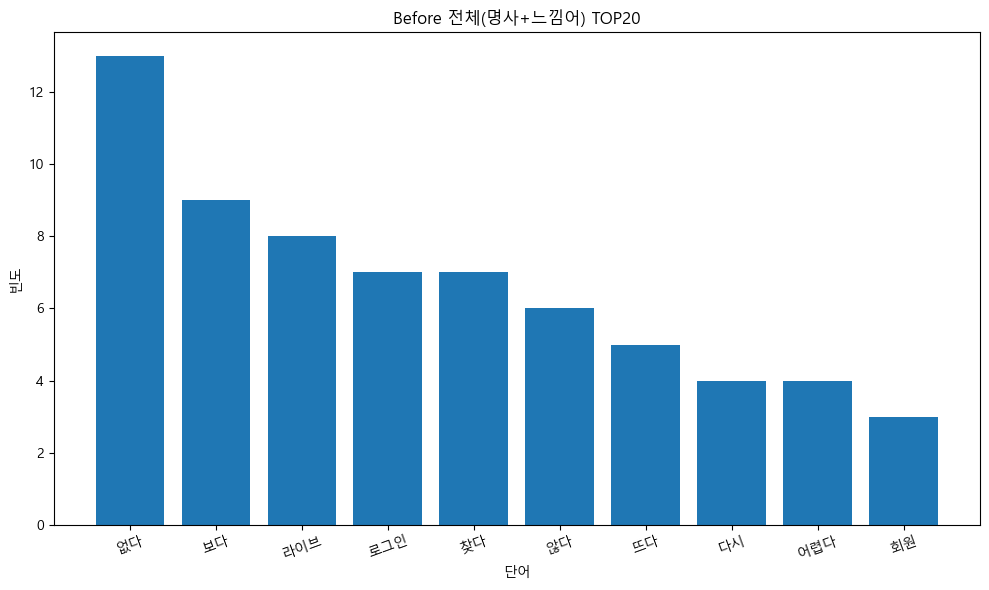

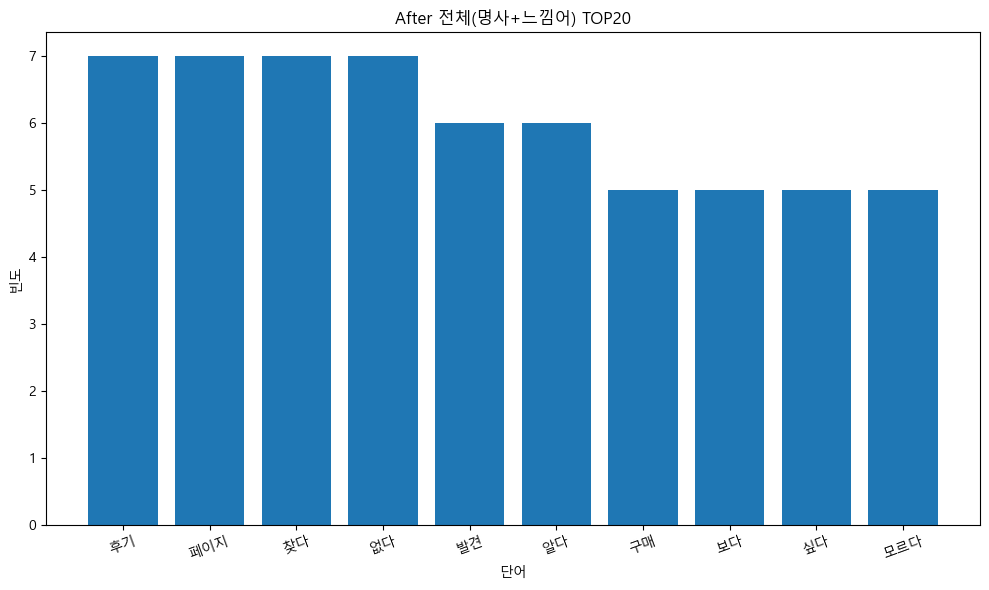

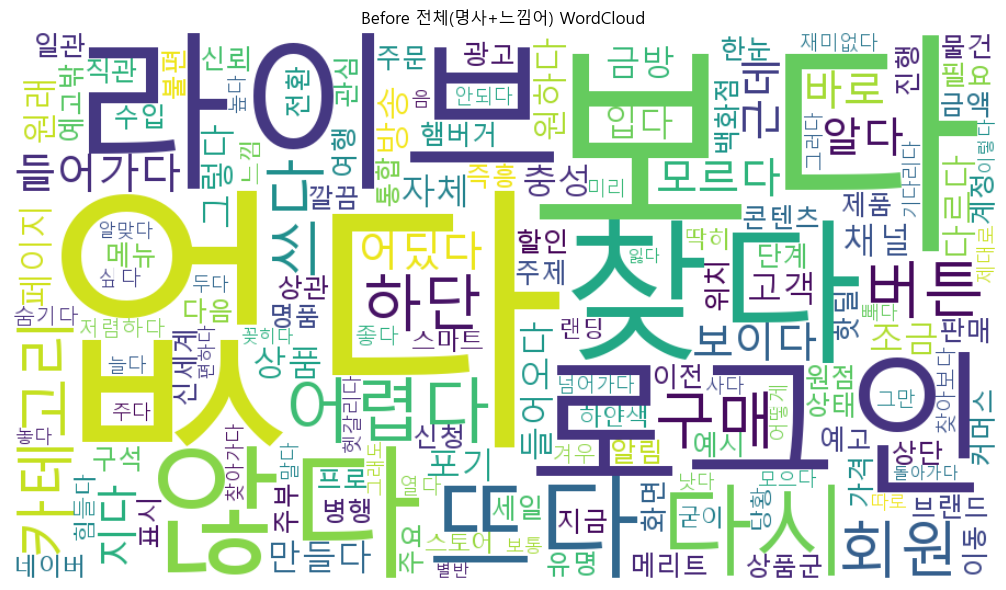

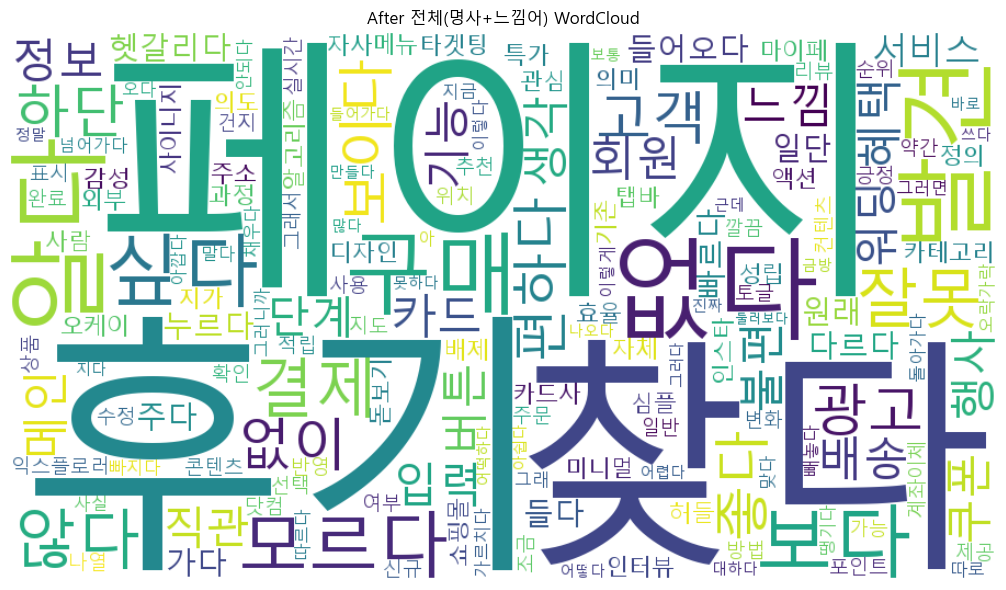

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# (이미 설정했다면 중복 설정 안 해도 됨)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

def plot_top(counter, title, topn=10):
    words = [w for w,_ in counter.most_common(topn)]
    freqs = [f for _,f in counter.most_common(topn)]
    plt.figure(figsize=(10,6))
    plt.bar(words, freqs)
    plt.title(title)
    plt.xlabel("단어")
    plt.ylabel("빈도")
    plt.xticks(rotation=20)
    plt.tight_layout()
    plt.show()

def show_wc(counter, title):
    wc = WordCloud(
        font_path="C:/Windows/Fonts/malgun.ttf",
        background_color="white",
        width=900, height=500
    ).generate_from_frequencies(dict(counter))
    plt.figure(figsize=(12,6))
    plt.imshow(wc, interpolation="bilinear")
    plt.title(title)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

# 🔵 전체(명사+느낌어) 그래프/워드클라우드
plot_top(before_all, "Before 전체(명사+느낌어) TOP20")
plot_top(after_all,  "After 전체(명사+느낌어) TOP20")

show_wc(before_all, "Before 전체(명사+느낌어) WordCloud")
show_wc(after_all,  "After 전체(명사+느낌어) WordCloud")

In [11]:
# 🔵 Before(오른쪽 이미지 느낌)
before_palette = ["#1F2933", "#254868", "#FFC800", "#FFE6C0"]  
#   어두운 네이비   스틸블루      선명한 노랑     크리미 베이지

before_palette2 = ["#1F2933"]  
#   어두운 네이비   스틸블루   

# 🟣 After(왼쪽 이미지 느낌)
after_palette  = ["#0B0620", "#3A0C85", "#FF2BB7", "#FFB11A"]
#   아주 어두운 남보라  딥 퍼플       핫핑크         오렌지옐로우

after_palette2  = ["#FF2BB7"]

In [12]:
from collections import Counter

def merge_counters(*counters):
    out = Counter()
    for c in counters: out.update(c)
    return out

# 이미 만든 before_nouns / before_feel / after_nouns / after_feel가 있다면:
before_all = merge_counters(before_nouns, before_feel)
after_all  = merge_counters(after_nouns,  after_feel)

In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import random

# 한글 깨짐 방지
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

def plot_top_colored(counter, title, topn=10, palette=None):
    words = [w for w,_ in counter.most_common(topn)]
    freqs = [f for _,f in counter.most_common(topn)]
    colors = [palette[i % len(palette)] if palette else None for i in range(len(words))]
    plt.figure(figsize=(10,6))
    plt.bar(words, freqs, color=colors)
    plt.title(title)
    plt.xlabel("단어")
    plt.ylabel("빈도")
    plt.xticks(rotation=20)
    plt.tight_layout()

class PaletteColorFunc:
    """워드클라우드 글자색을 팔레트에서 랜덤 고르는 함수"""
    def __init__(self, palette): self.palette = palette
    def __call__(self, *args, **kwargs): return random.choice(self.palette)

def wordcloud_with_palette(counter, title, palette, font_path="C:/Windows/Fonts/malgun.ttf"):
    wc = WordCloud(
        font_path=font_path,
        background_color="white",
        width=1200, height=700
    ).generate_from_frequencies(dict(counter))
    wc.recolor(color_func=PaletteColorFunc(palette))
    plt.figure(figsize=(12,7))
    plt.imshow(wc, interpolation="bilinear")
    plt.title(title)
    plt.axis("off")
    plt.tight_layout()

In [14]:
from matplotlib.backends.backend_pdf import PdfPages
import os

save_dir = r"C:\Users\PC\python_fang\251106_Inpowerproject_2"
os.makedirs(save_dir, exist_ok=True)
pdf_path = os.path.join(save_dir, "UT_morph_visuals_only_ver2.pdf")

with PdfPages(pdf_path) as pdf:
    # ---- BEFORE (블루-옐로우 톤) ----
    plot_top_colored(before_all, "Before 전체(명사+느낌어) TOP10", topn=10, palette=before_palette2)
    pdf.savefig(bbox_inches="tight"); plt.close()

    wordcloud_with_palette(before_all, "Before 전체(명사+느낌어) WordCloud", before_palette)
    pdf.savefig(bbox_inches="tight"); plt.close()

    # ---- AFTER (퍼플-핑크-오렌지 톤) ----
    plot_top_colored(after_all, "After 전체(명사+느낌어) TOP10", topn=10, palette=after_palette2)
    pdf.savefig(bbox_inches="tight"); plt.close()

    wordcloud_with_palette(after_all, "After 전체(명사+느낌어) WordCloud", after_palette)
    pdf.savefig(bbox_inches="tight"); plt.close()

print("✅ PDF 저장 완료 →", pdf_path)

✅ PDF 저장 완료 → C:\Users\PC\python_fang\251106_Inpowerproject_2\UT_morph_visuals_only_ver2.pdf
